# **LETS BEGIN !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Loading Dataset

# Airbnb Bookings Analysis Dataset
aba_df =pd.read_csv('Airbnb NYC 2019.csv')
print("Airbnb Booking Analysis Dataset :")
aba_df

### Dataset First View

In [ ]:
# Dataset First 5 rows view
aba_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
shape=aba_df.shape
print( "No. of Rows and Columns in Dataset are :", shape)


### Dataset Information

In [ ]:
# Dataset Info
print("Dataset Info :")
aba_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
length = len(aba_df[aba_df.duplicated()])
print("Dupilcate Value Count is :", length)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing Values/Null Values Count :")
print(aba_df.isnull().sum())

In [ ]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(aba_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Airbnb Dataset')
plt.show()


### What did you know about your dataset?

 **DATASET OVERVIEW :**

The Airbnb booking dataset comprises of **48895 rows** and **16 columns**, each representing a unique booking.
Features include host details, neighborhood information, room types, prices, availability, and reviews.

**Key Features Examined :**

Identification of features such as "host_id," "neighbourhood_group," "room_type," "price," and "availability_365" for analysis.
Exploration of categorical features like "neighbourhood_group" ,"neighbourhood"and "room_type" for insights into listing distribution.

**Missing Values :**

Notable missing values in the "last_review" and "reviews_per_month" column were observed, warranting further investigation.

**Duplicate Values :**                                       
There are no duplicate values in the dataset.

**Data Types Check :**

Evaluation of data types ensured proper handling of numeric, categorical, and datetime features.

**Foundation for Analysis :**

This initial exploration forms the basis for in-depth analysis, hypothesis testing, and deriving insights from the Airbnb booking dataset.


## **2.** ***Understanding Your Variables***

In [ ]:
# Dataset Columns
column_names=list(aba_df.columns)
print("Columns present in Dataset are :")
column_names

Columns present in Dataset are :


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
aba_df.describe()

### Variables Description

* **id** - Unique ID
* **name** - Name of the listing
* **host_id** - Unique host_id
* **host_name** - Name of the host
* **neighbourhood_group** - Location
* **neighborhood** - Area
* **latitude** - Latitude range
* **longitude** - Longitude range
* **room_type** - Type of listing
* **price** - Price of listing
* **minimum_nights** - Minimum nights to be paid for
* **number of reviews** - Number of reviews
* **last_review** - Content of the last review
* **reviews_per_month** - Number of checks per month
* **calculated_host_listing_count** -Total count
* **availability_365** - Availability around the year



### Check Unique Values for each variable

In [ ]:
for i in aba_df.columns.tolist():
  print("No. of unique values in ",i," = ",aba_df[i].nunique(),)

## **3.** ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Data Cleaning

# Checking how many columns has NA/NaN values
columns_with_nan = aba_df.columns[aba_df.isna().any()].tolist()
print("List of Columns contain NA values :", columns_with_nan)

# Replacing NA values where possible
aba_df['reviews_per_month'].fillna(0, inplace=True)# replacing Na values with 0 in reviews per month
aba_df['name'].replace('', None, inplace=True)# replacing '' (blank space) with None in name
aba_df['host_name'].replace('', None, inplace=True)# replacing '' (blank space) with None in host_name
aba_df['last_review'].fillna(pd.NaT, inplace=True)# replacing '' (blank space) values with NaT in last_review

In [ ]:
# Cheking Neighbourhood Group

# Checking for all Unique neighbourhood_group available
unique_neighbourhood_group = aba_df['neighbourhood_group'].value_counts()
print("There are",aba_df['neighbourhood_group'].nunique(),"Unique Neighbourhood Group present in Dataset , each accompanied by its respective count :")
print(unique_neighbourhood_group)
print("---------------------------------------------------------------------")

# Checking the count of neighbourhood within EACH neighbourhood group
unique_neighbourhood = aba_df.groupby('neighbourhood_group')['neighbourhood'].nunique()
print("Count of Neighbourhood present within each Neighbourhood Group :")
print(unique_neighbourhood)
print("---------------------------------------------------------------------")

# Average price of each room type in each neighbourhood group
ngroup_rtype_avg_price = aba_df.groupby(['neighbourhood_group','room_type']).describe()['price']['mean'].round(2)
print("Average Price of each Room Type in each Neighbourhood Group :")
print(ngroup_rtype_avg_price)
print("---------------------------------------------------------------------")

# Average no. of Minimum nights for each Room Type in each Neighbourhood Group
ngroup_rtype_avg_night = aba_df.groupby(['neighbourhood_group','room_type']).describe()['minimum_nights']['mean'].astype(int)
print(' Average no. of Minimum nights for each Room Type in each Neighbourhood Group')
print(ngroup_rtype_avg_night)
print("---------------------------------------------------------------------")

# Average Number of Reviews for each Room Type in each Neighbourhood Group
ngroup_rtype_avg_reviews = aba_df.groupby(['neighbourhood_group','room_type']).describe()['number_of_reviews']['mean'].round(2)
print(' Average Number of Reviews for each Room Type in each Neighbourhood Group')
print(ngroup_rtype_avg_reviews)
print("---------------------------------------------------------------------")

# Average Reviews Per Month for each Room Type in each Neighbourhood Group
ngroup_rtype_avg_reviews_pm = aba_df.groupby(['neighbourhood_group','room_type']).describe()['reviews_per_month']['mean'].round(2)
print(' Average Reviews Per Month for each Room Type in each Neighbourhood Group')
print(ngroup_rtype_avg_reviews_pm)
print("---------------------------------------------------------------------")

# Average Host listings count for each Room Type in each Neighbourhood Group
ngroup_rtype_avg_host_listing_count = aba_df.groupby(['neighbourhood_group','room_type']).describe()['calculated_host_listings_count']['mean'].round(2)
print(' Average Host listings count for each Room Type in each Neighbourhood Group')
print(ngroup_rtype_avg_host_listing_count)

In [ ]:
# Cheking Room Type

# Cheking the count of unique room type present
unique_room_type = aba_df['room_type'].value_counts()
print("There are",aba_df['room_type'].nunique(),"Unique Room Type present in Dataset,each accompanied by its respective count :")
print(unique_room_type)
print("---------------------------------------------------------- ")

# Checking Average(mean) price for each room type
room_type_avg_price = aba_df.groupby('room_type').describe()['price']['mean'].round(2)
print("Average Price of each Room type present :")
print(room_type_avg_price)
print("------------------------------------------------------------")

# Checking Average(mean) number of minimum nights for each room type
room_type_avg_nights=aba_df.groupby('room_type').describe()['minimum_nights']['mean'].astype(int)
print("Average Number of Minimum Nights for each room type present :")
print(room_type_avg_nights)
print("------------------------------------------------------------")#60

# Checking Average(mean) number of reviews for each room type
room_type_avg_reviews = aba_df.groupby('room_type').describe()['number_of_reviews']['mean'].round(2)
print("Average Number of Reviews for each room type present :")
print(room_type_avg_reviews)
print("------------------------------------------------------------")

# Max no of reviews received by each room_type
room_type_max_review = aba_df.groupby('room_type').describe()['number_of_reviews']['max']
print("Maximum Number of Reviews received by each room type")
print(room_type_max_review)
print("------------------------------------------------------------")

# Average Reviews per month received by each room_type
room_type_avg_reviews_pm = aba_df.groupby('room_type').describe()['reviews_per_month']['mean'].round(2)
print("Average Number of Reviews per Month for each room type present :")
print(room_type_avg_reviews_pm)
print("------------------------------------------------------------")

# Average number of host listings count for each room type
print("Average number of Host listings count for each room type :")
room_type_avg_host_listing_count = aba_df.groupby('room_type').describe()['calculated_host_listings_count']['mean'].round(2)
print(room_type_avg_host_listing_count)

In [ ]:
# Monthly Analysis based of last review

# Examining how the Number of Bookings varies each Month based on the dates of the last reviews to understand any recurring trends.

# Finding the 'last_review' months for each 'room_type' - By extracting month from last review
aba_df['last_review'] = pd.to_datetime(aba_df['last_review']) # converting to DATETIME to use it as Date for extracting month
aba_df['month'] = aba_df['last_review'].dt.month.astype(float) # Extracting month from last_review column using DATETIME dt.month

# All months Bookings count for each room type
booking_counts_by_room_type = aba_df.groupby(['room_type', 'month']).size().reset_index(name='booking_count')
print("Count of Bookings made for each month across all room types.")
print(booking_counts_by_room_type)
print('--------------------------------------------------------------')

# Top 3 months with the maximum booking counts for each room type
booking_counts_by_rtype=aba_df.groupby(['room_type', 'month']).size()
top_3_months_by_room_type_max = booking_counts_by_rtype.groupby('room_type', group_keys=False).nlargest(3).reset_index(name='booking_count')
print("Top 3 months for each room type when the maximum number of bookings occurred :")
print(top_3_months_by_room_type_max)
print('----------------------------------------------------------')

# Top 3 months with the minimum booking counts for each room type
top_3_months_by_room_type_min = booking_counts_by_rtype.groupby('room_type', group_keys=False).nsmallest(3).reset_index(name='booking_count')
print("Top 3 months for each room type when the minimum number of bookings occurred :")
print(top_3_months_by_room_type_min)
print('-----------------------------------------------------------')

# Analysing based on Each neighbourhood group

# Means in all neighbourhood_group which room type got maximum booking count along with respective month of max booking
# Top 3 Maximum Booking counts across all neighbourhood groups and room_type.
booking_counts_by_room_type_in_ngroup = aba_df.groupby(['neighbourhood_group', 'room_type', 'month']).size().nlargest(3).reset_index(name='booking_count')
print("Top 3 Maximum Booking counts across all neighbourhood groups and room types")
print(booking_counts_by_room_type_in_ngroup)
print('--------------------------------------------------------------')

# Maximum Booking count of each room type across all neighbourhood groups.
booking_counts_by_each_room_type_in_ngrp = aba_df.groupby(['neighbourhood_group', 'room_type', 'month']).size().reset_index(name='booking_count')
top3_by_room_type_in_ngrp = booking_counts_by_each_room_type_in_ngrp.groupby(['neighbourhood_group', 'room_type'], group_keys=False).apply(lambda x: x.nlargest(1, 'booking_count')).reset_index(drop=True)

print("Months in which Maximum Booking is made for each room type across all neighbourhood groups")
print(top3_by_room_type_in_ngrp)


In [ ]:
# Yearly Analysis based on last review

# Convert 'last_review' to datetime
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'])

# Extract Year and Month from 'last_review'
aba_df['year'] = aba_df['last_review'].dt.year.astype(float).astype('Int64')


# All years' Booking count for each room type
booking_counts_by_room_type_yearly = aba_df.groupby(['room_type', 'year']).size().reset_index(name='booking_count_yearly')
print("Count of Bookings made for each year across all room types.")
print(booking_counts_by_room_type_yearly)
print('--------------------------------------------------------------')

# Top 3 years with the maximum booking counts for each room type
booking_counts_by_rtype_yearly = aba_df.groupby(['room_type', 'year']).size()
top_3_years_by_room_type_max = booking_counts_by_rtype_yearly.groupby('room_type', group_keys=False).nlargest(3).reset_index(name='booking_count_yearly')
print("Top 3 years for each room type when the maximum number of bookings occurred :")
print(top_3_years_by_room_type_max)
print('----------------------------------------------------------')

# Top 3 years with the minimum booking counts for each room type
top_3_years_by_room_type_min = booking_counts_by_rtype_yearly.groupby('room_type', group_keys=False).nsmallest(3).reset_index(name='booking_count_yearly')
print("Top 3 years for each room type when the minimum number of bookings occurred :")
print(top_3_years_by_room_type_min)
print('-----------------------------------------------------------')

# Analysing based on Each neighbourhood group

# Means in all neighbourhood_group which room type got maximum booking count along with respective year of max booking
# Top 3 Maximum Booking counts across all neighbourhood groups and room_type.
booking_counts_by_room_type_in_ngroup_yearly = aba_df.groupby(['neighbourhood_group', 'room_type', 'year']).size().nlargest(3).reset_index(name='booking_count_yearly')
print("Top 3 Most Booked room types across all neighbourhood groups over all years")
print(booking_counts_by_room_type_in_ngroup_yearly)
print('--------------------------------------------------------------')

# Maximum Booking count of each room type across all neighbourhood groups.
booking_counts_by_each_room_type_in_ngrp_yearly = aba_df.groupby(['neighbourhood_group', 'room_type', 'year']).size().reset_index(name='booking_count_yearly')
top3_by_room_type_in_ngrp_yearly = booking_counts_by_each_room_type_in_ngrp_yearly.groupby(['neighbourhood_group', 'room_type'], group_keys=False).apply(lambda x: x.nlargest(1, 'booking_count_yearly')).reset_index(drop=True)

print("Year in which Maximum Booking is made for each room type across all neighbourhood groups")
print(top3_by_room_type_in_ngrp_yearly)


In [ ]:
# Month with Maximum Bookings for each year in Entire home/apt,Private room and Shared room 

# Convert 'last_review' to datetime
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'])

# Extract Year and Month from 'last_review'
aba_df['year'] = aba_df['last_review'].dt.year.astype(float).astype('Int64')
aba_df['month'] = aba_df['last_review'].dt.month.astype(float).astype('Int64')


# Month with Maximum Bookings for each year in Entire home/apt
entire_home_data = aba_df[aba_df['room_type'] == 'Entire home/apt']
booking_counts_by_month_yearly = entire_home_data.groupby(['room_type','year', 'month']).size().reset_index(name='booking_count_monthly')

# Find the month with the maximum bookings for each year
max_booking_month_entire_home = booking_counts_by_month_yearly.loc[booking_counts_by_month_yearly.groupby(['year'])['booking_count_monthly'].idxmax()]

print("Month with Maximum Bookings for each year in 'Entire home/apt':")
print(max_booking_month_entire_home)
print('------------------------------------------------------------------------')

# Month with Maximum Bookings for each year in Private room
entire_private_data = aba_df[aba_df['room_type'] == 'Private room']
booking_counts_by_month_yearly = entire_private_data.groupby(['room_type','year', 'month']).size().reset_index(name='booking_count_monthly')

# Find the month with the maximum bookings for each year
max_booking_month_private_room = booking_counts_by_month_yearly.loc[booking_counts_by_month_yearly.groupby(['year'])['booking_count_monthly'].idxmax()]

print("Month with Maximum Bookings for each year in 'Private Room':")
print(max_booking_month_private_room)
print('-------------------------------------------------------------------------')

# Month with Maximum Bookings for each year in Shared room
entire_shared_data = aba_df[aba_df['room_type'] == 'Shared room']
booking_counts_by_month_yearly = entire_shared_data.groupby(['room_type','year', 'month']).size().reset_index(name='booking_count_monthly')

# Find the month with the maximum bookings for each year
max_booking_month_shared_room = booking_counts_by_month_yearly.loc[booking_counts_by_month_yearly.groupby(['year'])['booking_count_monthly'].idxmax()]

print("Month with Maximum Bookings for each year in 'Shared Room':")
print(max_booking_month_shared_room)


In [ ]:
# Distribution Analysis

# 25%, 50%, and 75% Quartile Distribution of Prices Across All Neighborhoods and Room Types
price_summary = aba_df.groupby(['neighbourhood_group','room_type'])['price'].describe(percentiles=[0.25, 0.5, 0.75])

# Additional Observation: Interquartile Range (IQR)
price_summary['iqr'] = price_summary['75%'] - price_summary['25%']

print("Quartile Distribution of Prices Across All Neighborhoods and Room Types with Interquartile Range (IQR):")
print(price_summary.loc[:, ['25%', '50%', '75%', 'iqr']])
print('-------------------------------------------------------------------------')

# Room Type Distribution Summary Across Neighbourhood Groups
ngroup_summary = aba_df.groupby(['neighbourhood_group'])['room_type'].describe()
print("Room Type Distribution Summary Across Neighbourhood Groups")
print(ngroup_summary)

In [ ]:
# Average number of  Minimum Nights booked per listing 

# Assuming each review in number of reviews corresponts to atleast 1 night hence using number of reviews
# Calculate the average nights booked per listing
average_nights_booked = aba_df['number_of_reviews'].mean().astype(int)

print(f"The average number of nights booked per listing is: {average_nights_booked}")


The average number of nights booked per listing is: 23


In [ ]:
# Average price per night

# Calculate the average price per night
aba_df['average_price_per_night'] = aba_df['price'] / aba_df['minimum_nights']

# Calculate the overall average
average_price_per_night = aba_df['average_price_per_night'].mean()

print(f"The average price per night is: ${average_price_per_night:.2f}")


The average price per night is: 70.17


In [ ]:
# Hosts Average income per listing

# Calculate the income for each listing
aba_df['income'] = aba_df['price'] * aba_df['calculated_host_listings_count']

# Calculate the average income per listing
average_income_per_listing = aba_df['income'].sum() / len(aba_df['income'])

print(f"The average income per listing is: ${average_income_per_listing:.2f}")


The average income per listing is: $1545.84


In [ ]:
# Analysis whether Short-Term rentals(minimum nights <= 30) are more preferred or Long-Term-rentals(minimum nights > 30)

# Classify listings as short-term or long-term
aba_df['rental_type'] = pd.cut(aba_df['minimum_nights'], bins=[0, 30, float('inf')], labels=['Short-term', 'Long-term'])

# Calculate the count of short-term and long-term rentals
rental_type_counts = aba_df['rental_type'].value_counts()

print("Count of Short-term Rentals:")
print(rental_type_counts['Short-term'])

print("Count of Long-term Rentals:")
print(rental_type_counts['Long-term'])


Count of Short-term Rentals:
48148
Count of Long-term Rentals:
747


In [ ]:
# Analysing Hosts with Multiple Listings(more than 1) are more in number or Hosts with Single Listings(only 1)

# Calculate the distribution of listings per host
number_of_hosts_for_each_listing_count = aba_df['calculated_host_listings_count'].value_counts(normalize=True) * 100

# Creating a MultiIndex DataFrame
result_df = pd.DataFrame({'No.of Hosts Percentage': number_of_hosts_for_each_listing_count})
result_df.index.name = 'listing'

print("Number of Hosts Percentage for Each Listing Count:")
print(result_df)

# Identify hosts with multiple listings (i.e , hosts with more than one listing)
multiple_listings_hosts = aba_df[aba_df['calculated_host_listings_count'] > 1]

# Display the count and percentage of hosts with multiple listings
total_hosts = len(aba_df['calculated_host_listings_count'])
multiple_listings_count = len(multiple_listings_hosts)
single_listings_count = total_hosts - multiple_listings_count

print(f"\nTotal Hosts: {total_hosts}")
print(f"Hosts with Multiple Listings: {multiple_listings_count} ({(multiple_listings_count / total_hosts) * 100:.1f}%)")
print(f"Hosts with Single Listing: {single_listings_count} ({(single_listings_count / total_hosts) * 100:.1f}%)")


Number of Hosts Percentage for Each Listing Count:
         No.of Hosts Percentage
listing                        
1                     66.066060
2                     13.616934
3                      5.834952
4                      2.945086
5                      1.728193
6                      1.165763
8                      0.850803
7                      0.816034
327                    0.668780
9                      0.478577
232                    0.474486
10                     0.429492
96                     0.392678
12                     0.368136
13                     0.265876
121                    0.247469
11                     0.224972
52                     0.212701
103                    0.210655
33                     0.202475
49                     0.200429
91                     0.186113
87                     0.177932
15                     0.153390
14                     0.143164
23                     0.141119
34                     0.139074
17                   

In [ ]:
# Top 20 hosts having maximum listing

# Assuming 'room_type' is a column in your dataframe
top_hosts = aba_df.groupby(['host_name', 'room_type']).size().unstack(fill_value=0)
top_hosts['calculated_host_listings_count'] = top_hosts.sum(axis=1)
top_20_hosts = top_hosts.sort_values(by='calculated_host_listings_count', ascending=False).head(20)

print(top_20_hosts)



room_type,Entire home/apt,Private room,Shared room,calculated_host_listings_count
host_name,,,,
Michael,251,152,14,417
David,214,184,5,403
Sonder (NYC),319,8,0,327
John,135,153,6,294
Alex,175,95,9,279
Blueground,232,0,0,232
Sarah,115,107,5,227
Daniel,130,95,1,226
Jessica,102,100,3,205


### What all manipulations have you done and insights you found?

##### **Data Manipulations:**

**For Yearly Analysis:**

* Converted 'last_review' to datetime.
* Extracted the year from 'last_review'.
* Grouped data by room type and year to analyze booking trends over the years.
* Identified the top 3 years with maximum and minimum booking counts for each room type.

**In Neighbourhood-Group Analysis:**

* Examined the maximum booking counts across all neighbourhood groups and room types.
* Analyzed the year in which each room type had the maximum booking count in each neighbourhood group.

**In Monthly Analysis:**

* Extracted year and month from 'last_review'.
* Analyzed the month with the maximum bookings for each year in different room types.

**For Host Analysis:**

* Calculated the average number of minimum nights booked per listing.
* Determined the average price per night.
* Calculated the average income per listing for hosts.

**For Rental Type Analysis:**

* Classified listings as short-term or long-term based on minimum nights.
* Identified the count of short-term and long-term rentals.

**For Host Listings Distribution:**

* Analyzed the distribution of listings per host.
* Identified hosts with multiple listings.

**Top Hosts Analysis:**

* Identified the top 20 hosts with the maximum number of listings.

##### **Below is the insight Found :**

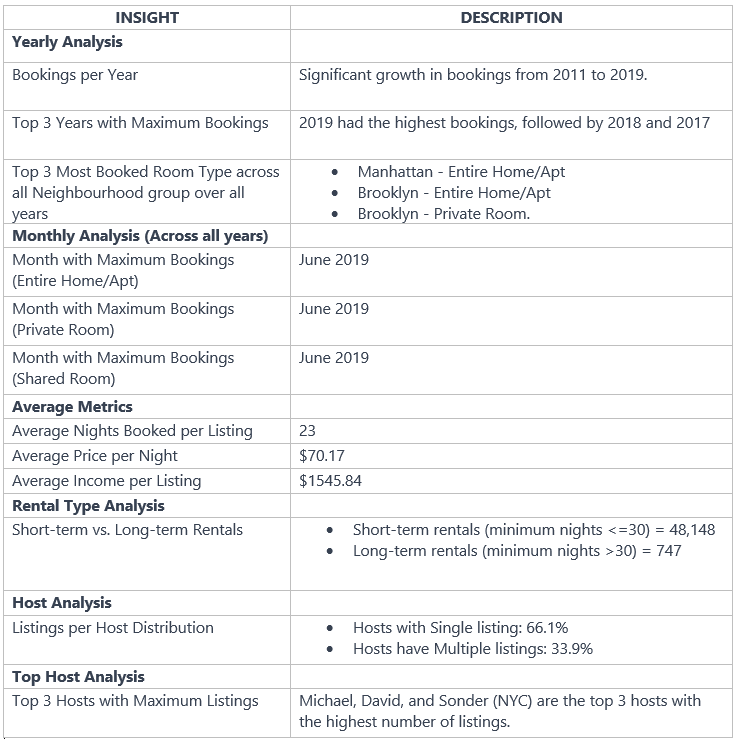



---


#### **Neighbourhood Group Analysis**

---



##### **Data Manipulations:**
* Counted the number of unique neighbourhood groups and their respective counts.
* Explored the count of unique neighbourhoods within each neighbourhood group.
* Calculated average prices, minimum nights, reviews, and reviews per month for each room type in each neighbourhood group.

##### **Below is the insight Found:**
> **Count of Neighbourhood present within each Neighbourhood Group :**



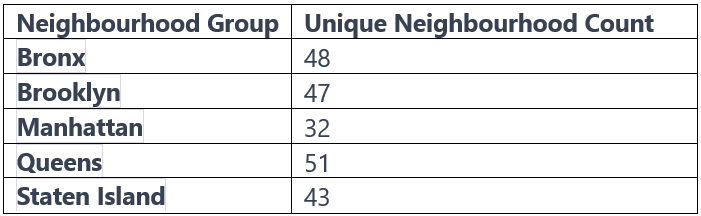

 > **Neighbourhood Group Averages:**

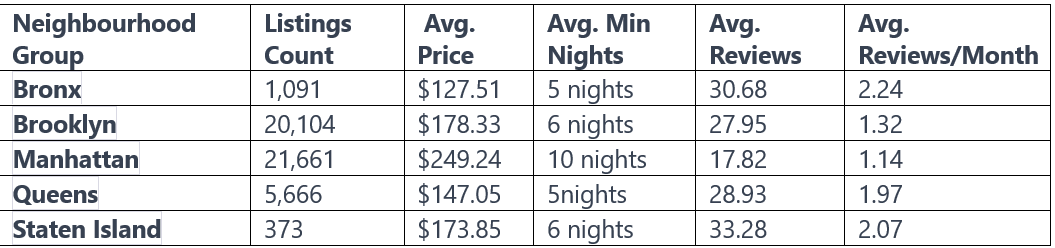






---


#### **Room Type Analysis**


---



##### **Data Manipulations**
* Counted the number of unique room types and their respective counts.
* Calculated average prices, minimum nights, reviews, maximum reviews, and reviews per month.

##### **Below is the Insights Found**

> **Room Type Averages:**


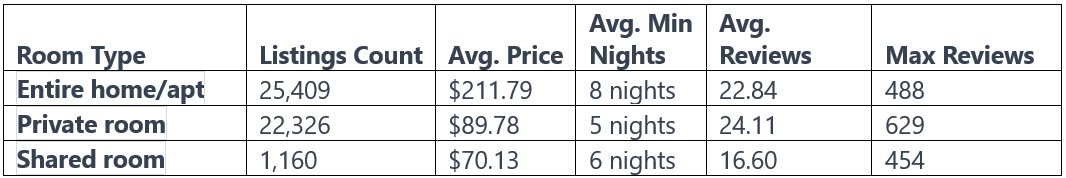




---


#### **Booking Trend Analysis**


---



In the **Second half** of the year, a **notable increase in bookings** was consistently observed, **particularly in months May, June, and July**. Additionally, the booking trends exhibited a **consistent upward pattern from 2011 to 2019** and **with a remarkable spike in 2019, indicating an exceptional increase in that particular year.**

**Top 3 Months with Maximum Booking for each Room Type:**

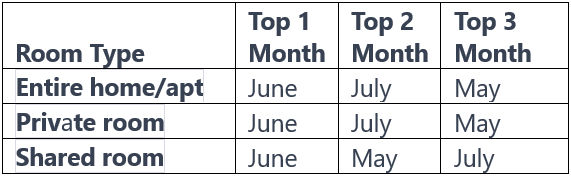



---


#### **Distribution Analysis**


---



##### **Data Manipulations**
* Examined quartile distribution of prices across all neighbourhoods and room types.
* Provided a summary of room type distribution across neighbourhood groups.

##### **Below is the Insights Found**
> **Prices Quartile Distribution:**

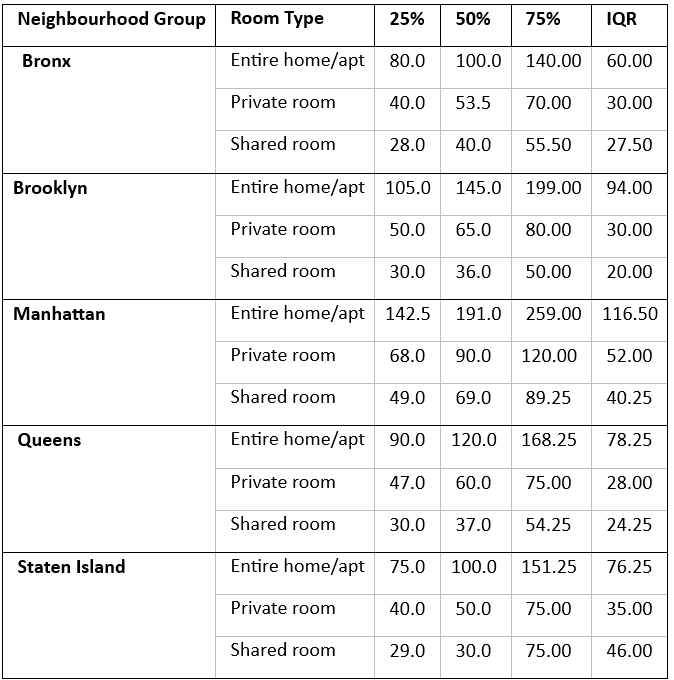

> **Room Type Distribution Summary Across Neighbourhood Groups:**

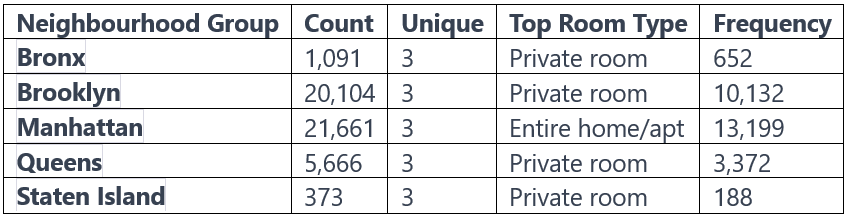

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Preffered Neighbourhood Group (Univariate)

In [ ]:
# Countplot to check which neighbourhood is most preferred i.e which has more count
plt.figure(figsize=(6, 4))
sns.countplot(x='neighbourhood_group', data=aba_df)
plt.xticks(rotation=90)  # Rotates x-axis labels for better readability
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.title('Preferred Neighborhoods Group')

plt.show()


##### 1. Why did you pick the specific chart?


A countplot is chosen for visualizing the preferred neighborhood groups based on their count. A countplot is suitable when you want to **see the frequency** or distribution of categorical data. In this case, it helps in quickly comparing the number of listings in each neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

* As we dive into the visual, the chart paints a clear picture. **Manhattan
stands tall as the most preferred neighborhood group**, capturing the attention of hosts and visitors alike. Its vibrant streets and iconic landmarks make it a hotspot for Airbnb activity.

* Following closely is the trendy and diverse borough of **Brooklyn, indicating a strong second preference.**.Followed by Queens,Bronx,Staten Island.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact:** If you're a host or investor, this info is like finding a treasure map. Manhattan and Brooklyn seem like golden spots for growth and making some **extra cash**.

* **Negative Growth Consideration:** The flip side suggests that **more people means more competition** and **higher costs** that is expenses related to property maintenance, marketing efforts, and potentially higher property acquisition costs. So, while Manhattan shines bright, there's a need to balance the shine with other factors.While popular neighborhoods offer growth potential, it's essential to weigh the benefits against the challenges and make informed decisions.

#### Chart - 2: Preffered Room Type (Univariate)

In [ ]:

# Countplot to check which room type is most preferred i.e which has more count
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=aba_df)
plt.xticks(rotation=90)  # Rotates x-axis labels for better readability
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Preferred Room Type')

plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a **countplot**. It is suitable for comparing the **frequency** or distribution of categorical data, making it ideal for visualizing the preferred room types based on the count of Airbnb listings.

##### 2. What is/are the insight(s) found from the chart?


* **Top Preference:** **Entire home/apartment** is in high demand, indicating a preference for more private and exclusive accommodations.

* **Secondary Preference:** **Private rooms** are also highly preferred, suggesting a balance between privacy and affordability.

* **Less Preferred:** **Shared rooms** have a lower count, indicating a lower level of preference, possibly due to a preference for more personal space.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



 > **Positive Impact:**


  Understanding the preferred room types is a win for the Airbnb platform as a whole. Hosts, armed with insights into guest preferences, can optimize their listings accordingly. This optimization leads to a positive ripple effect:

* **Increased Bookings:** By tailoring listings to what guests desire, hosts are likely to attract more bookings. Whether it's promoting entire homes or private rooms, aligning with guest preferences translates into a higher likelihood of reservations.
* **Positive Guest Experiences:** When guests find what they're looking for, it contributes to positive experiences. Satisfied guests are more likely to leave positive reviews, creating a cycle of positive feedback that benefits both hosts and the Airbnb platform.

> **Negative Growth Consideration:**

* **Potentially Lower Revenue:** Shared rooms may not be as lucrative as entire homes or private rooms. If hosts heavily invest in shared accommodations without assessing demand, it could result in lower revenue potential.
* **Strategic Thinking:** While shared rooms are less preferred, it might also indicate a potential market gap for hosts willing to cater to the shared accommodation niche. However, entering this market requires careful consideration of the target audience and competition.

#### Chart - 3: Popular Neighborhoods within each Neighbourhood Group (Univariate)

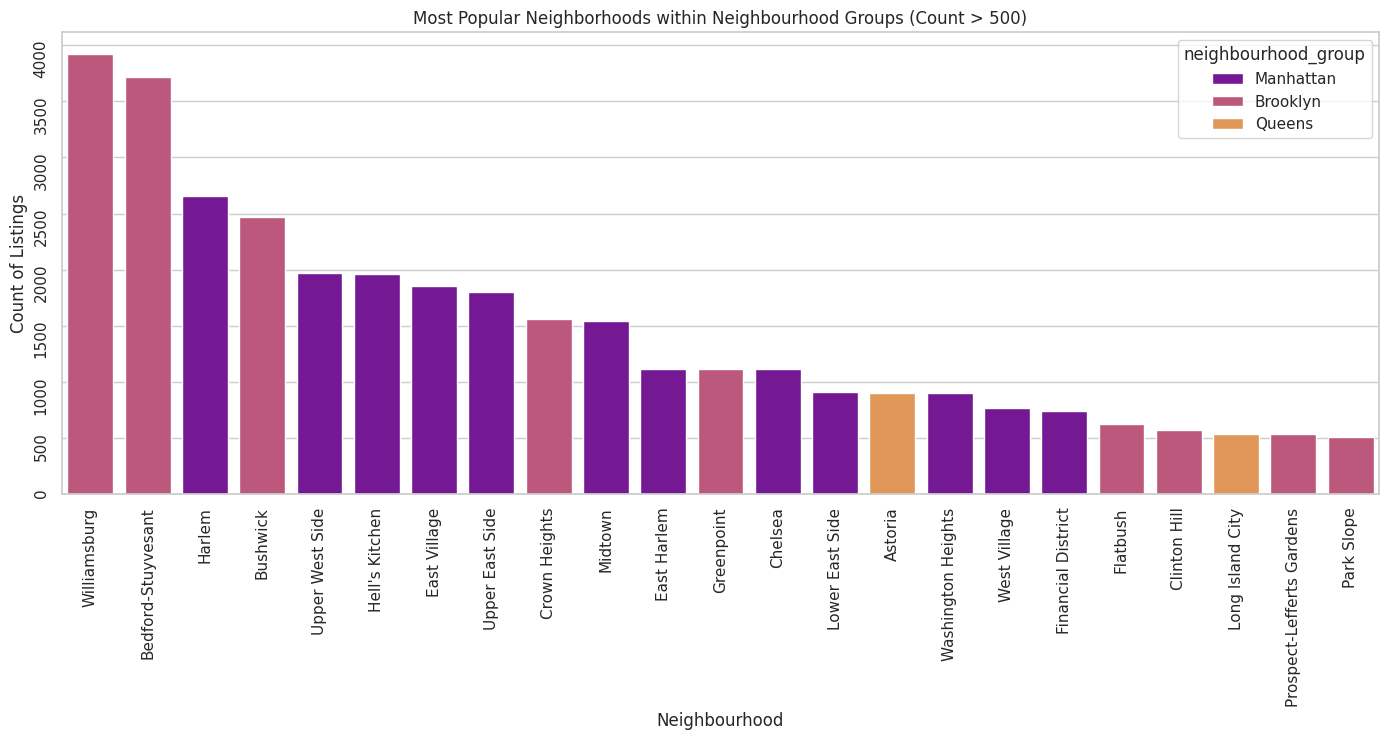

In [ ]:
# Neighborhoods(where Count > 500) within Neighbourhood Groups
counts = aba_df['neighbourhood'].value_counts()
neighbourhoods_greater_than_500 = counts[counts > 500].index.tolist()

filtered_df = aba_df[aba_df['neighbourhood'].isin(neighbourhoods_greater_than_500)]

# Create the countplot
plt.figure(figsize=(17,6))
sns.countplot(data=filtered_df , x='neighbourhood', hue='neighbourhood_group',order=neighbourhoods_greater_than_500, palette='plasma')
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Listings')
plt.title('Most Popular Neighborhoods within Neighbourhood Groups (Count > 500)')
plt.yticks(rotation=90)
plt.xticks(rotation=90)

plt.show()

##### 1. Why did you pick the specific chart?



I chose a **countplot** because it effectively displays the count of listings for the most popular neighborhoods within each neighborhood group. The hue parameter allows us to distinguish between different neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?



* The chart highlights the **most popular neighborhoods** **within each neighborhood group**, considering only those neighborhoods **with a count of listings greater than 500**.
* The chart helps hosts pick popular neighborhoods within large neighbourhood groups. Choosing where to list properties can be tricky in big neighborhood groups. By showing which neighborhoods are more popular, the chart helps hosts decide where to list their listings. This is important because listing in popular neighborhoods increases the chances of getting more guests. In simple terms, **the chart guides hosts in making smart choices about where to list their properties to attract more guests**.

##### 3. Will the gained insights help in creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




* Yes , Hosts can identify the most popular neighborhoods and adjust their pricing or marketing strategies accordingly.
* Businesses can focus marketing efforts or partnerships in these high-demand neighborhoods to attract more customers.

**Negative Growth Consideration:**

If certain neighborhoods have significantly fewer listings, it might indicate untapped potential or a less attractive neighbourhood for guests. **Hosts may need to assess whether it's worth investing resources in such neighbourhoods**.

#### Chart - 4: Average Price Trend Over Years (Univariate)

In [ ]:
# Convert 'last_review' to datetime and extract the year
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'])
aba_df['year'] = aba_df['last_review'].dt.year

# Group by year and calculate the average price
average_price_by_year = aba_df.groupby('year')['price'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
plt.title('Average Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

print("Average Price per Year")
print(average_price_by_year)


##### 1. Why did you pick the specific chart?


I chose the **line plot** to visually represent the annual evolution of average listing prices from 2011 to 2019. This specific chart is effective in highlighting trends and patterns in pricing over the specified time period.

##### 2. What is/are the insight(s) found from the chart?



>**Overall Decrease in Average Price:**

* The chart illustrates a general decline in the average price of listings from 2011 to 2019.
* It implies that the business may have adopted a pricing strategy aimed at maintaining competitiveness or attracting a broader customer base.

>**Exceptional Increase in 2013:**

* In 2013, there is a significant spike in the average price.
* It implies that Understanding the factors behind this anomaly could provide insights into potential external events or factors that influenced pricing during that period. Further investigation is needed to uncover the specific reasons for this increase, as no evidence of successful or unsuccessful strategies, such as changes in count or reviews, was found. The increase appears to be within the normal range, without any discernible patterns or indicators of positive or negative impact on pricing.

##### 3. Will the gained insights help in creating a positive business impact?
 Are there any insights that lead to negative growth? Justify with specific reasons.



>**Positive Impact:**

* **Optimizing Pricing Strategies:** The insights into the overall decrease can guide the business in optimizing pricing strategies to align with market dynamics and customer expectations.
* **Leveraging 2013 Exception:** Analyzing the exceptional increase in 2013 can provide valuable information for understanding the factors that influenced pricing during that period.

>**Negative Growth Consideration:**

* **Market Competitiveness:** A continued decrease in average prices may indicate a highly competitive market or potential challenges in maintaining profitability.
* **Profitability Concerns:** While lower prices can attract customers, sustained reductions without careful consideration may impact profitability negatively.

#### Chart - 5: Average Price Trend Over Years by Room Type (Bivariate)

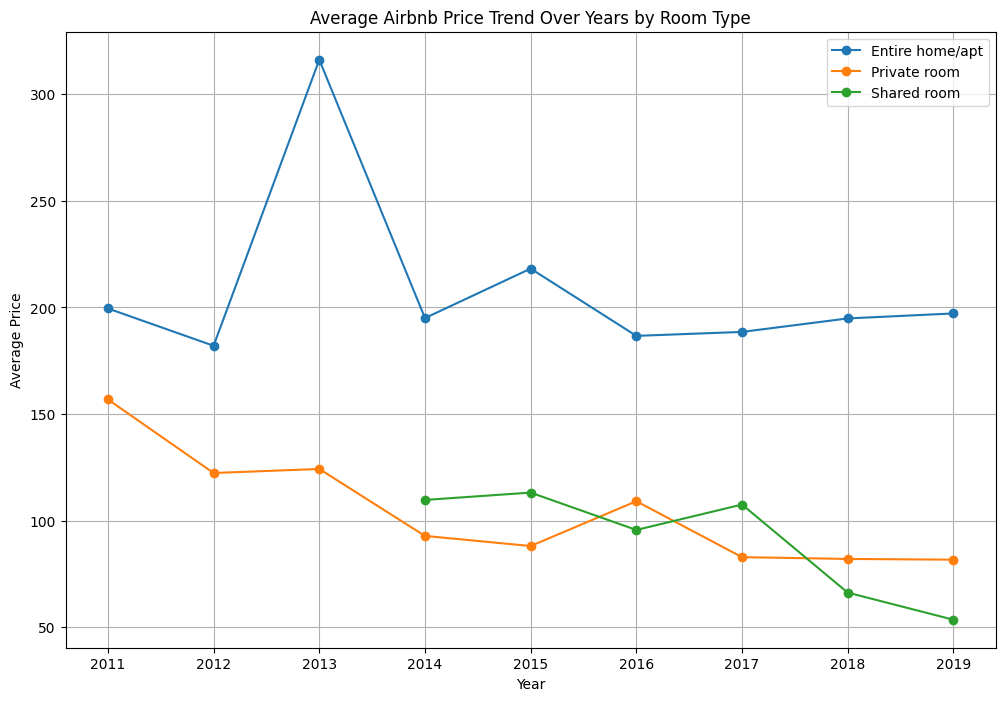

In [ ]:
# Converting last review column to datetime
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'])

# Extract Year from 'last_review'
aba_df['year'] = aba_df['last_review'].dt.year.astype(float).astype('Int64')

# Group by year and room type, calculate the average price
average_price_by_year_room_type = aba_df.groupby(['year', 'room_type'])['price'].mean().unstack()

# Plot the trend for each room type over years
plt.figure(figsize=(12, 8))
for room_type in average_price_by_year_room_type.columns:
    plt.plot(average_price_by_year_room_type.index, average_price_by_year_room_type[room_type], marker='o', label=room_type)

plt.title('Average Airbnb Price Trend Over Years by Room Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)

plt.show()



##### 1. Why did you pick the specific chart?



I selected the Line plot to visually analyze how the average prices of different room types have evolved annually. This specific chart format, with separate lines for each room type, facilitates a clear comparison of price trends over time.

##### 2. What is/are the insight(s) found from the chart?




**Entire Home/Apartment:**

Prices for entire homes/apartments exhibit fluctuations, with a significant spike in 2013 and slight variations in subsequent years.This suggests that potential external factors are influencing prices, and it may be beneficial to investigate the reasons behind the 2013 spike.

**Private Room:**

Private room prices got peaked in 2011 and 2013, followed by a consistent decrease over the years. This drop in prices might be because people's preferences changed, or more competition came in. Another possibility is that lowering prices is a strategy to get more customers, as guests often prefer lower-priced listings.

**Shared Room:**

 Shared room prices started in 2014 and have generally decreased since then.
This could be because of changes in how the market works or because more people prefer private spaces over shared ones.

##### 3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reasons.


* Yes , Understanding the fluctuations in prices for each room type enables businesses to make strategic adjustments, potentially attracting more customers and making a positive business impact.
* Adapting pricing strategies based on customer demand trends can positively impact customer satisfaction.

**Negative Growth Consideration:**

* A consistent decrease in prices for certain room types may pose challenges in maintaining profitability.
* Lowering prices without careful thought can result in losses, so making informed and calculated decisions is essential before reaching any conclusions.
* The spikes in 2013 for both entire home/apartment and private room categories warrant investigation. If these spikes are not due to increased demand or special events, it suggests that the *pricing strategies at that time might have been different* or influenced by certain factors. *Understanding what strategies were in place during that period*, and whether they contributed to the spikes, can provide valuable insights for improving current pricing strategies. It's an opportunity to learn from past experiences and make informed adjustments to enhance business performance.

#### Chart - 6: Average Price Trend Over Months by Room Type (Bivariate)

<Figure size 1200x800 with 0 Axes>

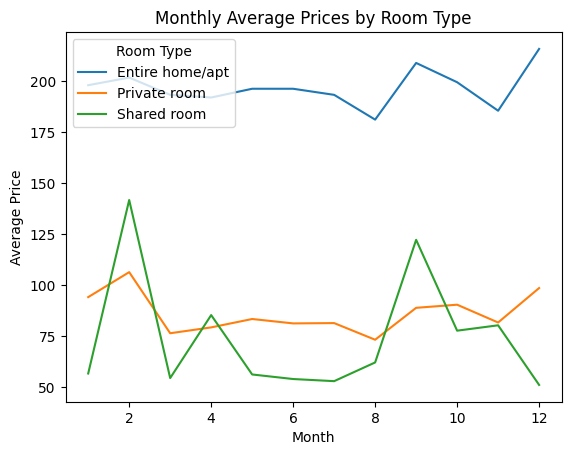

In [ ]:
# predicting trends (monthly) between avg price & room type

# Conveting 'last_review' to datetime
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'], format='%d-%m-%Y', errors='coerce')

# Filter out rows with NaT in 'last_review'
aba_df = aba_df.dropna(subset=['last_review'])

# Create a pivot table to calculate the mean price for each room type and each month
monthly_avg_price_by_room = pd.pivot_table(aba_df, values='price', index=aba_df['last_review'].dt.month, columns='room_type', aggfunc='mean')

# Plot the monthly average prices for each room type
plt.figure(figsize=(12,8))
monthly_avg_price_by_room.plot()
plt.title('Monthly Average Prices by Room Type')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Room Type', loc='upper left')

plt.show()


##### 1. Why did you pick the specific chart?



I chose a **line plot** to visualize the trends in monthly average prices for different room types over time. A line plot is suitable for showing variations and trends in data over a continuous axis, making it effective for illustrating how average prices change across different months for each room type.

##### 2. What is/are the insight(s) found from the chart?



The chart indicates that, on average, room prices are lower in the warmer months of May, June, and July, but they go up in the colder months of December and January. This trend suggests a pattern influenced by the seasons. **During the summer, prices are lower, likely attracting more bookings.** However, **in December and January, despite higher prices, there are still a lot of bookings**. This indicates that **during the winter, especially around major festivals like Christmas and New Year, people are willing to pay higher prices for accommodations.**


##### 3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with a specific reason.


Yes, the insights can be valuable for pricing strategies and business planning. **Understanding the seasonality of pricing allows hosts to optimize rates based on expected demand during different months.**
Hosts can potentially attract more bookings during lower-priced months by emphasizing affordability, and during higher-priced months, they can capitalize on increased demand by adjusting rates accordingly.

>**Negative Growth Consideration:**

* One potential negative impact could be if hosts fail to adjust prices based on seasonality. Even though summer months (May, June, and July) have maximum bookings, the demand might be more sensitive to price. In other words, **guests may be more inclined to book during the summer but might be looking for lower-priced listings.**

*  If hosts keep prices high during summer months of potentially higher demand for lower-priced listings, it could lead to decreased bookings and occupancy rates. Guests might choose more affordable options over higher-priced accommodations during the summer.

* It's a balance between meeting the demand for lower prices during popular times (like summer) and potentially adjusting prices upwards during peak demand periods (like winter festivals) when guests may be willing to pay more.

#### Chart - 7: Average Price Trends in Different Neighbourhood Groups (Bivariate)

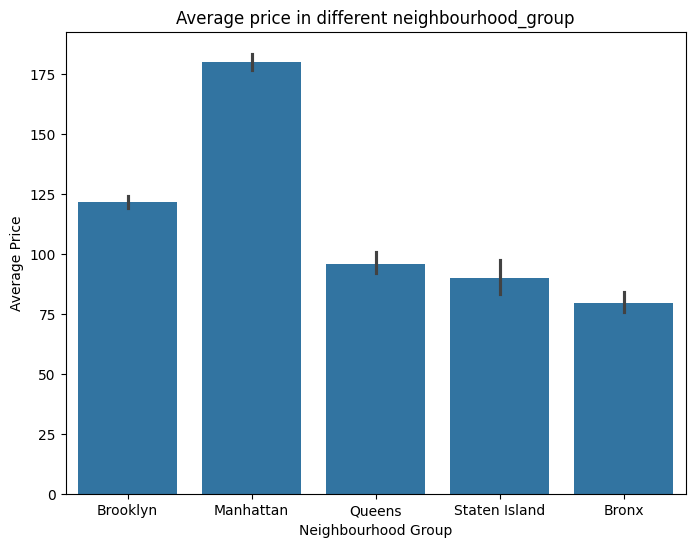

In [ ]:
# Create the bar plot for Neighbourhood group vs price
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_group', y='price', data=aba_df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average price in different neighbourhood_group')

plt.show()


##### 1. Why did you pick the specific chart?



The **bar plot** was chosen because it effectively visualizes and compares the average prices across different neighborhood groups. The x-axis represents the neighborhood groups, the y-axis represents the average price, and the bars provide a clear and straightforward way to compare pricing levels.

##### 2. What is/are the insight(s) found from the chart?



The chart shows that **Manhattan has the most expensive prices**, and **Brooklyn is next**, followed by Queens, Staten Island, and the Bronx. **Even though Manhattan keeps prices high, it attracts a lot of hosts and guests. This suggests that both Manhattan and Brooklyn are really popular among guests and hosts**. Knowing this helps hosts decide how to set their prices in different areas.

##### 3. Will the gained insights help in creating a positive business impact?
Are there any insights that lead to negative growth? Justify with a specific reason.


Yes, the insights can positively impact business decisions. Hosts can use this information to set competitive and strategic prices for their listings based on the neighborhood. Understanding the pricing dynamics can attract guests looking for specific locations and help optimize revenue.

**Negative Growth Consideration:**
There isn't a direct negative impact from the insights provided. However, if hosts in less expensive neighborhoods set their prices unrealistically high, it may lead to decreased bookings and potential negative growth. **Setting prices too high without considering the overall market dynamics may impact occupancy rates and guest satisfaction negatively.**

#### Chart - 8: Average Price by Room Type (Bivariate)

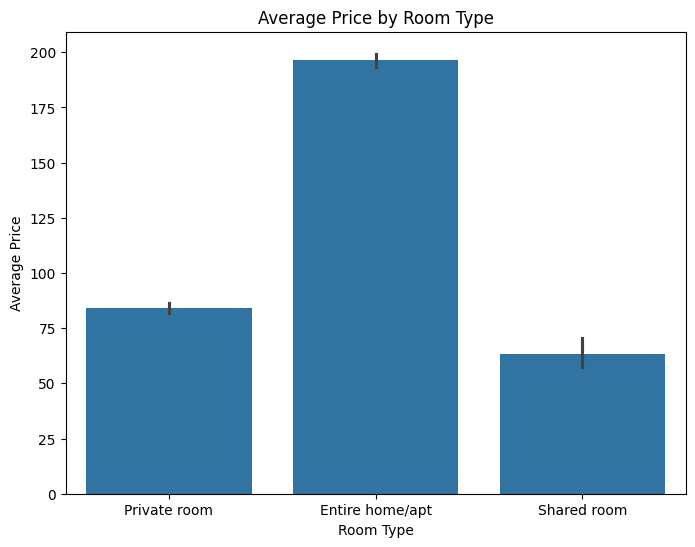

In [ ]:
# Calculate the average price for each room type
average_prices = aba_df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Create the bar plot for average price
plt.figure(figsize=(8, 6))  # Creating a new figure
sns.barplot(x='room_type', y='price', data=aba_df)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')

plt.show()

##### 1. Why did you pick the specific chart?



I chose a **bar plot** because it is effective for comparing the average prices of different room types. The bars provide a clear visual representation, allowing for an easy comparison between the room types.

##### 2. What is/are the insight(s) found from the chart?



The chart reveals that **"Entire home" listings have the highest average prices**, followed by "Private room," and **"Shared room" has the lowest average price**. This hierarchy provides a straightforward understanding of the relative pricing levels among different room types.

#####3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can positively impact business decisions. Hosts can use this information to strategically set prices based on room types. Knowing that "Entire home" listings command higher prices, hosts can tailor their marketing strategies to attract guests seeking premium accommodations.**It allows hosts to align their pricing with guest expectations and potentially increase revenue from each room type.**

> **Negative Growth Consideration:**

* There isn't a direct indication of negative growth from the provided insights. However, if hosts fail to align their pricing strategies with the observed hierarchy, there could be challenges.
* For instance, if "Entire home" listings are priced too low or "Shared room" listings are priced too high, it may result in missed revenue opportunities or a potential decrease in overall bookings. Adapting pricing strategies based on the observed room type hierarchy is essential for maximizing positive business impact.

#### Chart - 9: Relationship Between Prices and Number of Reviews (Bivariate)

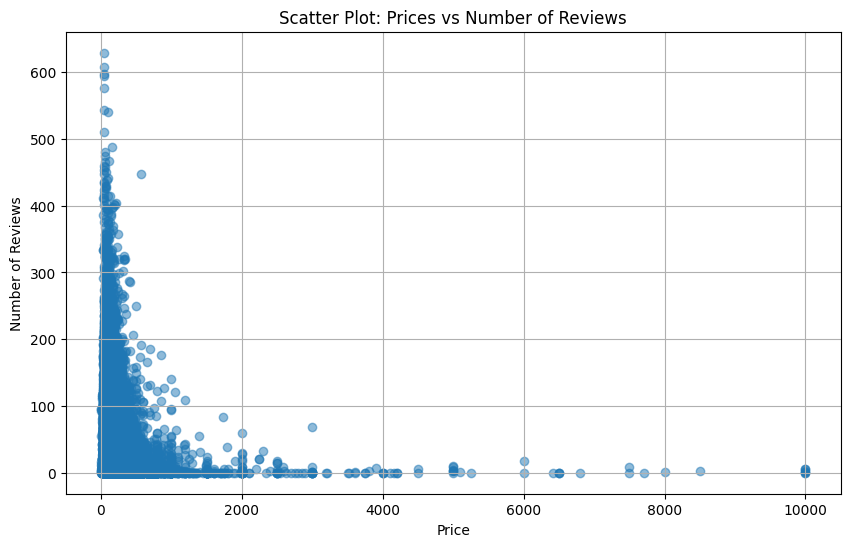

In [ ]:
# Scatter plot between prices and number_of_reviews to Indentify whether with increasing price , no of reviews increase or decrease.
plt.figure(figsize=(10, 6))
plt.scatter(aba_df['price'], aba_df['number_of_reviews'], alpha=0.5)
plt.title('Scatter Plot: Prices vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)

plt.show()

##### 1.Why did you pick the specific chart?



The **scatter plot** is an appropriate choice for visualizing the **relationship between two continuous variables**, in this case, prices and the number of reviews. It allows for the identification of patterns, trends, and potential correlations between the variables.

##### 2.What is/are the insight(s) found from the chart?



The scatter plot reveals a potential **negative correlation between prices and the number of reviews**. As prices increase, the number of reviews tends to decrease. This suggests that lower-priced listings tend to attract more reviews, while higher-priced listings receive fewer reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



**Positive Impact:** Yes, the insights can help guide pricing strategies. If the goal is to maximize the number of reviews, hosts may consider pricing their listings competitively or offering discounts for higher-priced units. Attracting more reviews can enhance the visibility and desirability of a listing on the platform.

**Negative Growth Consideration:** The negative growth consideration arises from the observation that higher-priced listings tend to have fewer reviews. Here's a more detailed analysis:

*   **Guest Attraction Challenge:**
Fewer reviews for higher-priced listings indicate potential challenges in attracting guests at those price points.

* **Value Proposition Evaluation:**
Hosts should evaluate their value proposition, focusing on unique features, amenities, and the overall experience offered to justify higher prices.

* **Amenities and Service Quality:**
Ensure amenities and service quality align with guest expectations for the given price, emphasizing a superior experience.

* **Competitive Analysis:**
Conduct a competitive analysis to identify areas for improvement and differentiation relative to similar listings in the market.

* **Marketing Optimization:**
Revisit marketing strategies, optimizing listing descriptions, and highlighting unique selling points to enhance perceived value.

* **Feedback Utilization:**
Analyze guest feedback to identify recurring concerns or points of dissatisfaction, guiding improvements aligned with guest expectations.

* **Promotions and Incentives:**
Explore promotions or special offers to attract guests to higher-priced listings, providing incentives that enhance perceived value.



#### Chart - 10: Analyzing  Mean and Median for Number of Reviews

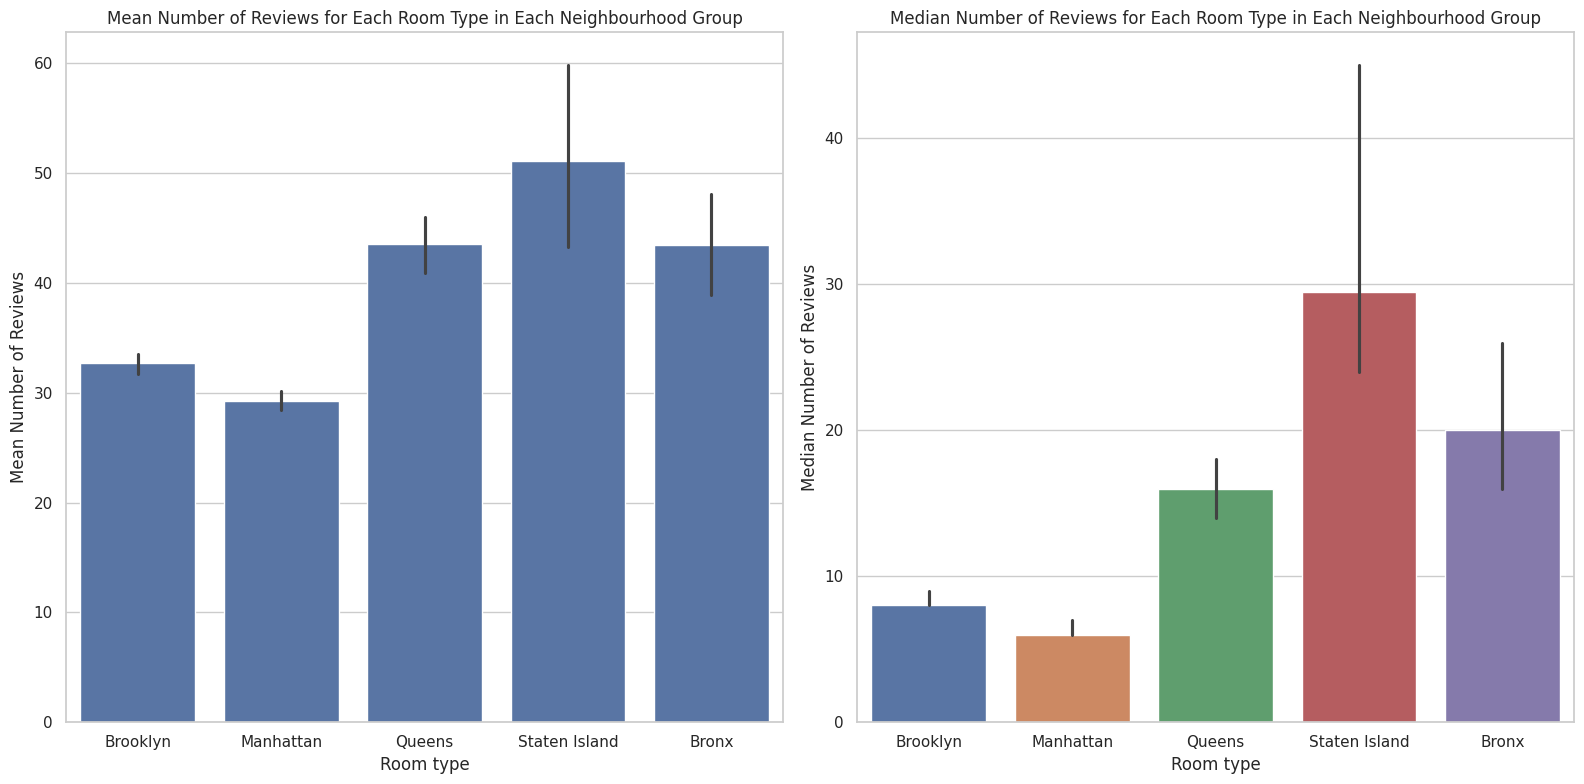

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(16, 8))

# Plot the mean number of reviews
plt.subplot(1, 2, 1)
sns.barplot(data=aba_df, x='neighbourhood_group', y='number_of_reviews', estimator='mean', dodge=0.2)
plt.xlabel('Room type')
plt.ylabel('Mean Number of Reviews')
plt.title('Mean Number of Reviews for Each Room Type in Each Neighbourhood Group')

# Plot the median number of reviews
plt.subplot(1, 2, 2)
sns.barplot(data=aba_df, x='neighbourhood_group', y='number_of_reviews', estimator='median', palette='deep')
plt.xlabel('Room type')
plt.ylabel('Median Number of Reviews')
plt.title('Median Number of Reviews for Each Room Type in Each Neighbourhood Group')


plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?



I picked the **bar chart** to compare the mean and median number of reviews for each neighborhood group. This allows us to understand the distribution of review counts, helping identify potential variations and outliers.

##### 2. What is/are the insight(s) found from the chart?



* The mean number of reviews provides an average value, and it's intresting to note that **Staten Island has the highest mean**, followed by Queens, Bronx, and Brooklyn, while **Manhattan received the lowest mean**.

* When considering the median, representing the middle value in a dataset, indicating that half of the values are below or equal to that point, my analysis compared both the mean and median. Staten Island boasts the highest median, but Manhattan has a relatively lower median compared to other neighborhoods. This suggests that, in Manhattan, a substantial number of listings received reviews less than or equal to 6.

* **The median value of the number of reviews dataset for Manhattan is 6, signifying that many hosts have relatively fewer reviews, potentially from new hosts or those with less than 6 or even 0 reviews**. While a few hosts have extremely high review values, the majority have less than 6 reviews or none at all, leading to a low mean and median of number of reviews, especially when compared to other neighborhoods. **Despite the high number of bookings in Manhattan, individual listings don't receive many reviews.** In contrast, **Staten Island and Bronx have the highest median values, likely due to having fewer hosts, resulting in established, older hosts who have already gained a good number of reviews.** This is why both the mean and median are high, indicating that in Staten Island, around half of the listings received around 29 reviews (median = 29).

* The low mean in popular neighborhoods like Manhattan and Brooklyn, where competition is fierce, suggests that hosts should implement strategies to attract guests. Offering special deals, providing excellent services, and encouraging guests to leave feedback and reviews can help hosts stand out, increasing visibility, attracting more guests, and ultimately maximizing revenue. Conversely, in less popular neighborhoods like Staten Island, hosts can focus on providing good services and continually improving service quality to maintain a good number of reviews.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



* Yes, Hosts can tailor their strategies based on the competition and popularity in each neighborhood. For popular areas like Manhattan and Brooklyn, hosts can focus on standing out by offering special deals and excellent services to attract more guests.
* Encouraging guests to leave reviews can enhance visibility and trust for individual listings. This can lead to increased bookings and revenue.

**Negative Growth Consideration:**

* **Competition in Popular Areas:** The analysis suggests that there is intense competition in popular areas like Manhattan and Brooklyn. New hosts or those with fewer reviews may find it challenging to attract guests. This could potentially lead to negative growth if hosts in these areas don't adopt effective strategies to differentiate themselves.

* **Balancing Quality and Quantity:** While attracting more guests is essential, hosts should also ensure the quality of their service to maintain positive reviews. Overreliance on attracting guests without a focus on providing a positive experience could lead to negative growth in the long run.

In summary, hosts should use the insights to strike a balance between attracting guests, standing out in competitive markets, and maintaining a high-quality guest experience. This holistic approach can contribute to sustained positive growth.








#### Chart - 11: Relationship Between Prices and Last Review *Year*(Bivariate)





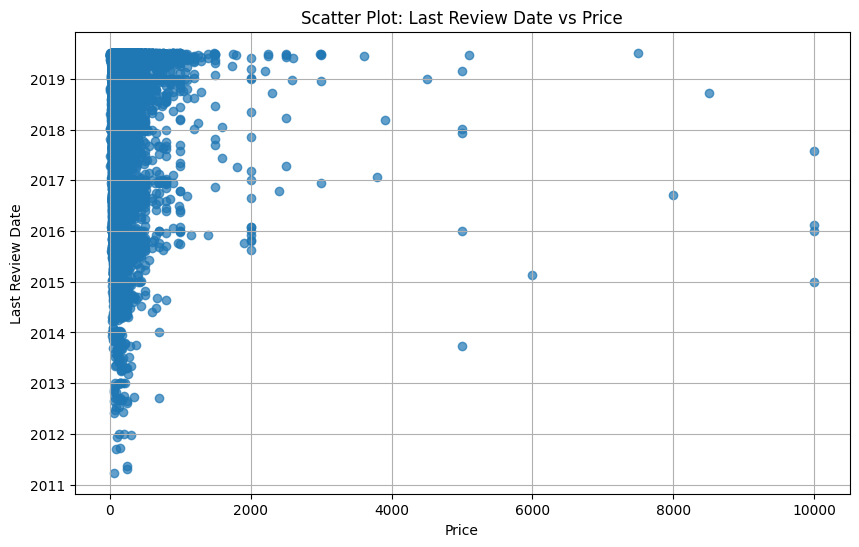

In [ ]:
# Converting last review column to datetime
aba_df['last_review'] = pd.to_datetime(aba_df['last_review'])

plt.figure(figsize=(10, 6))
plt.scatter(aba_df['price'], aba_df['last_review'], alpha=0.7)
plt.title('Scatter Plot: Last Review Date vs Price')
plt.xlabel('Price')
plt.ylabel('Last Review Year')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?


I chose **scatter plot** to visually examine the relationship between the pricing of listings and the Last Review year .This allows me to understand whether an increase in prices results in more or less last reviews ,where last review serving as an indicator for booking activity , over the period from 2011 to 2019.

##### 2. What is/are the insight(s) found from the chart?



>**Increasing Last Review Activity:**

* The chart reveals a significant increase in the number of last reviews over the years.
It implies that the business has experienced a **notable growth** **in review activity**, indicating **increased customer engagement and bookings.**

>**Concentration in Lower Price Range:**

* The tremendous rate of last review growth is particularly pronounced for lower-priced listings.
* It implies that the Lower-priced listings are not only attracting more reviews, but the rate of growth is exceptional, suggesting a **strong correlation between affordability and customer engagement**.

##### 3. Will the gained insights help in creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.



>**Positive Impact:**

* **Enhanced Reputation:** The increase in last review activity is generally positive, contributing to an enhanced online reputation for the business.
* **Customer Trust and Bookings:** A growing number of reviews, especially for lower-priced listings, can build trust and attract more bookings, positively impacting the business.

>**Negative Growth Consideration:**

* **Potential Challenges with Overcrowding:** The exceptional rate of growth in last reviews, particularly for lower-priced listings, may pose challenges related to managing high demand, potential overcrowding, or increased competition in the lower price range.
* **Quality Management:** As review activity grows, maintaining the quality of customer experiences becomes crucial. Addressing negative feedback promptly is essential to avoid negative impacts on business growth.

#### Chart - 12: Distribution of Hosts Based on Single(=1) and Multiple Listing(>1) (Bivariate)


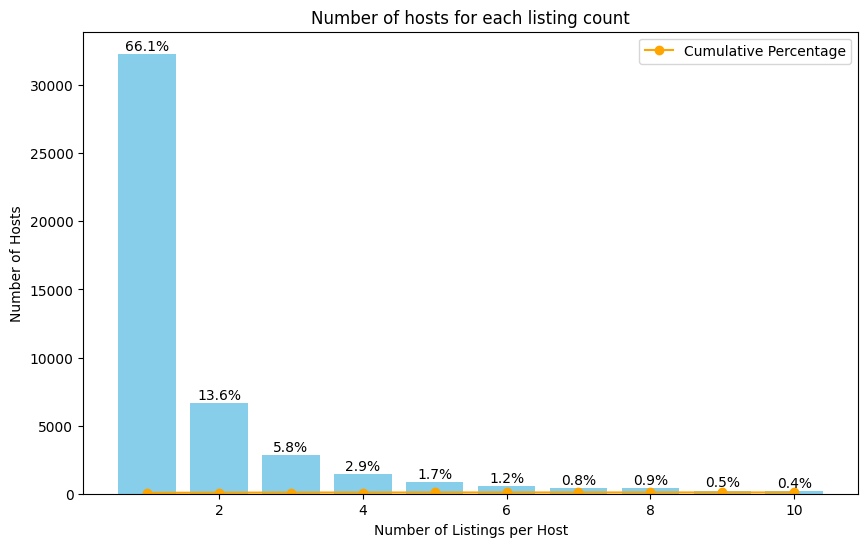


Total Hosts: 48895
Hosts with Multiple Listings: 16592 (33.9%)
Hosts with Single Listing: 32303 (66.1%)


In [ ]:
# Calculate the distribution of listings per host
number_of_hosts_for_each_listing_count = aba_df['calculated_host_listings_count'].value_counts().sort_index()

# Select only hosts with up to 10 listings for better visualization
number_of_hosts_for_each_listing_count = number_of_hosts_for_each_listing_count[number_of_hosts_for_each_listing_count.index <= 10]


# Calculate the cumulative sum for the x-axis
cumulative_percentage = number_of_hosts_for_each_listing_count.cumsum() / len(aba_df['calculated_host_listings_count']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(number_of_hosts_for_each_listing_count.index, number_of_hosts_for_each_listing_count, color='skyblue')
plt.plot(number_of_hosts_for_each_listing_count.index, cumulative_percentage, marker='o', color='orange', label='Cumulative Percentage')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Number of Hosts')
plt.title('Number of hosts for each listing count')
plt.legend()

# Add annotations for the top of each bar
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    percentage = yval  / len(aba_df['calculated_host_listings_count']) * 100
    plt.text(xval, yval + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()
print(f"\nTotal Hosts: {total_hosts}")
print(f"Hosts with Multiple Listings: {multiple_listings_count} ({(multiple_listings_count / total_hosts) * 100:.1f}%)")
print(f"Hosts with Single Listing: {single_listings_count} ({(single_listings_count / total_hosts) * 100:.1f}%)")

##### 1. Why did you pick the specific chart?


We used a **bar plot with a cumulative percentage line** to show the number of listings hosts have. It's like looking at a chart **that tells us how many hosts have one listing** (with thier percentage on top)**and how many have more.**




 ##### 2. What is/are the insight(s) found from the chart?


The chart highlights that **32,303(66.1%) hosts, and each host owns only one listing**, while the remaining **16,592(33.9%) hosts have multiple listing (i.e more than one listing)** (hosts with up to 10 listings is shown in plot for better visibility).
Insights:
* **Dominance of Single-Listing Hosts:** The majority of hosts on Airbnb have a single listing, suggesting a significant portion of hosts are individual property owners or small-scale hosts.
* **Presence of Multi-Listing Hosts:** While single-listing hosts dominate, there is still a substantial number of hosts with multiple listings, contributing to the diversity of available accommodations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Airbnb can leverage this information to design targeted support programs. For instance, initiatives to assist single-listing hosts in optimizing their listings, and separate strategies to engage and support hosts with multiple listings.

**Negative Growth Consideration:** While having a majority of single-listing hosts contributes to a diverse range of offerings, Airbnb might need to explore ways to attract and retain hosts interested in expanding their portfolios. Encouraging growth among hosts can lead to increased overall inventory and variety for guests.

#### Chart - 13: Average Minimum Nights Across Room Types (Bivariate)

In [ ]:
# Creating the bar plot for Minimum nights
plt.figure(figsize=(8, 6))  # Creating a new figure
sns.barplot(x='room_type', y='minimum_nights', data=aba_df)
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.title('Average Minimum nights by Room Type')
plt.show()

# Calculate the average nights booked per listing
average_nights_booked = aba_df['number_of_reviews'].mean().astype(int)

print(f"Average Nights Booked : {average_nights_booked} Nights")

# Calculate the average price per night
aba_df['average_price_per_night'] = aba_df['price'] / aba_df['minimum_nights']

# Calculate the overall average
average_price_per_night = aba_df['average_price_per_night'].mean()

print(f"Average Price/Night : ${average_price_per_night:.2f}")


# Calculate the income for each listing
aba_df['income'] = aba_df['price'] * aba_df['calculated_host_listings_count']

# Calculate the average income per listing
average_income_per_listing = aba_df['income'].sum() / aba_df['calculated_host_listings_count'].sum()

print(f"Average Income : ${average_income_per_listing:.2f}")

##### 1. Why did you pick the specific chart?


I chose a **bar plot** because it is effective for comparing the average minimum nights for different room types. Bar plots visually represent the differences in a clear and straightforward manner, making it easy to compare minimum nights across room types.

##### 2. What is/are the insight(s) found from the chart?


The chart reveals that, on average,**guests staying in "Entire home/apt" tend to stay for more nights**, followed by "Private room," and **"Shared room" has the lowest average minimum nights**. This insight provides a clear understanding of the typical duration of stays for each room type.

**Average Nights Booked:**
The average number of nights booked per listing is **23 Nights**. This metric provides insight into the typical duration of stays across the entire dataset, reflecting guest behavior regarding booking lengths.

**Average Price/Night:**
The average price per night across all listings is **$70.17**. This information aids hosts in setting competitive pricing strategies and understanding the market dynamics.

**Average Income:**
The average income per listing, considering the calculated host listings count, is **$1545.84**. This metric reflects the overall financial performance of listings, considering both price and the number of listings managed by hosts.

##### 3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with a specific reason.



Yes, the insights can potentially have a positive impact on business decisions. Hosts can use this information to set realistic expectations for guests based on room types. For example, hosts with "Entire home/apt" listings can emphasize longer-term stays, potentially attracting guests looking for extended accommodations. It allows hosts to tailor their messaging and services to align with the typical duration of stays for each room type.

>**Negative Growth Consideration:**

If guests find that hosts have set a minimum night requirement that is higher than what they anticipated or desire for their stay, it can indeed lead to dissatisfaction. Guests may have specific plans or preferences for shorter stays, and encountering a minimum night requirement that doesn't align with their expectations can result in the following issues:

* **Inconvenience:** Guests may find it inconvenient if they have to adjust their travel plans or look for alternative accommodations that better suit their desired duration.

* **Booking Cancellation:** Some guests may choose to cancel their booking altogether if they are unable or unwilling to meet the higher minimum night requirement, leading to potential disruptions in the host's occupancy.

* **Negative Reviews:** Dissatisfied guests might leave negative reviews reflecting their disappointment with the minimum night requirement, impacting the host's overall reputation.

#### Chart - 14: Preferred Room Types Across Neighborhood Groups (Bivariate)

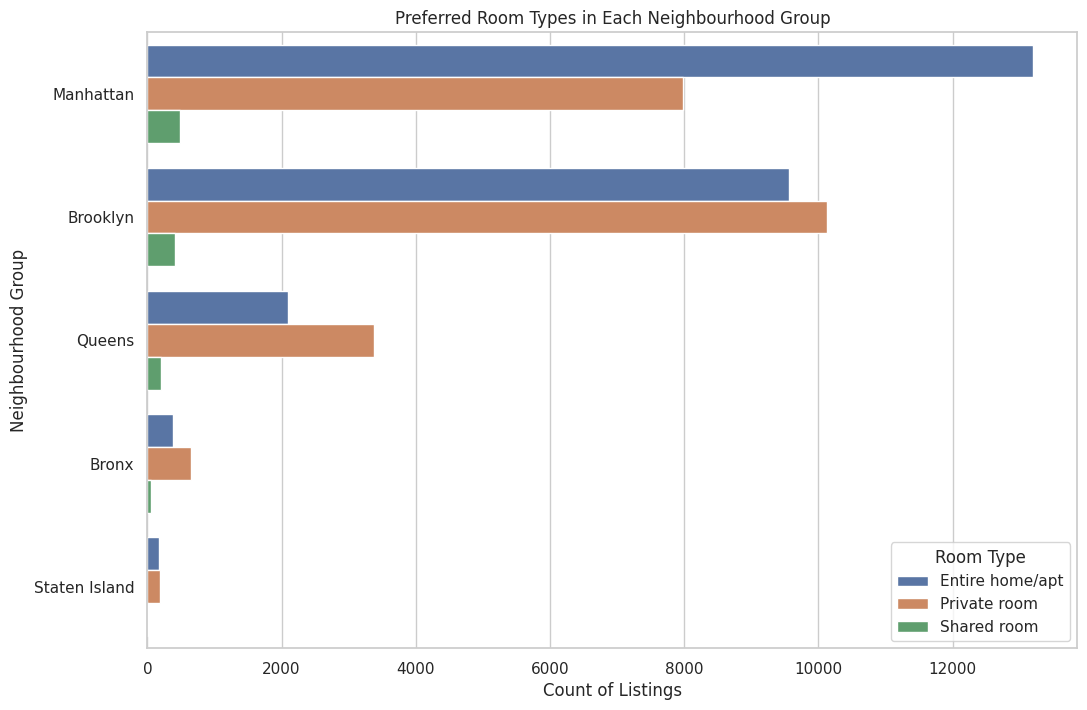

In [ ]:
# Group by 'neighbourhood_group' and 'room_type', count occurrences, and reset index
preferred_room_types = aba_df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

# Sort the data by count in descending order
preferred_room_types_sorted = preferred_room_types.sort_values(by='count', ascending=False)

# Set the plotting style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='neighbourhood_group', hue='room_type', data=preferred_room_types_sorted)

# Set plot labels and title
plt.xlabel('Count of Listings')
plt.ylabel('Neighbourhood Group')
plt.title('Preferred Room Types in Each Neighbourhood Group')

# Show the legend
plt.legend(title='Room Type', title_fontsize='12')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?


The chosen chart is a **grouped horizontal bar plot**, which is suitable for comparing the distribution of preferred room types across different neighborhood groups. The use of color (hue) distinguishes between room types within each neighborhood group, making it easy to visualize the preferences.

#####2. What is/are the insight(s) found from the chart?






* **Manhattan: Entire homes are the most preferred**, followed by private rooms and shared rooms.
* **Brooklyn: Private rooms are the most preferred**, followed by entire homes and shared rooms.
* **Queens: Private rooms are the most preferred**, followed by entire homes and shared rooms.
* **Bronx: Private rooms are the most preferred**, followed by entire homes and shared rooms.
* **Staten Island: Private rooms are the most preferred**, followed by entire homes.

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Yes , Hosts can tailor their listings based on the predominant preferences in each neighborhood, potentially attracting more guests.
* Understanding room type preferences allows hosts to optimize their offerings and cater to the most popular choices in a given area.

**Negative Growth Consideration:**

There isn't a direct negative impact from the insights provided. However, if hosts in less expensive neighborhoods set their prices unrealistically high, it may lead to decreased bookings and potential negative growth. Setting prices too high without considering the overall market dynamics may impact occupancy rates and guest satisfaction negatively.
**In summary, the bar plot effectively communicates the pricing hierarchy among different neighborhood groups, providing valuable insights for hosts to optimize their pricing strategies** and potentially enhance their business outcomes.

:#### Chart - 15: 365 Days Available Room Type Across All Neighborhood Groups (Bivariate)

In [ ]:
# Filter the DataFrame to include only rows where availability_365 is equal to 365
availability_365_365 = aba_df[aba_df['availability_365'] == 365]

# Group by both 'neighbourhood_group' and 'room_type' to count occurrences
grouped_data = availability_365_365.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

#  Countplot to visualize the 365-day availability of *each Room type count across all Neighborhood Groups by counting its occurance in dataframe
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='neighbourhood_group', y='count', hue='room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count of each Room Type available 365 days')
plt.title('365 Days Available Room Type Across All Neighborhood Groups')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?


I picked a **grouped bar chart (countplot)** because it effectively visualizes the count of each room type available for 365 days across different neighborhood groups. This type of chart allows us to compare the distribution of room types within each neighborhood group.


 ##### 2. What is/are the insight(s) found from the chart?

**Room Type Availability Distribution:**

* The chart provides a clear visual representation of the count of each room type available for 365 days in different neighborhood groups.

* Manhattan has the highest count for all room types, indicating that properties in Manhattan are more frequently available for booking throughout the year.

**Neighborhood Group Comparison:**

* Among the neighborhood groups, **Manhattan has the highest count, followed by Brooklyn, Queens, Bronx, and Staten Island.**
This suggests that Manhattan has a larger number of properties available for booking for the entire year compared to other neighborhood groups.
Room Type Comparison:

* The chart also shows the distribution of room types within each neighborhood group. For example, it reveals whether entire homes/apartments, private rooms, or shared rooms are more commonly available for 365 days.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



* The insights can help property owners and Airbnb hosts make informed decisions about pricing strategies, marketing efforts, and property management based on the demand for different room types in each neighborhood group.
* Understanding the popularity of room types in specific areas can guide hosts in optimizing their listings for maximum occupancy and revenue.

**Negative Growth Consideration:**

Hosts in areas with consistently low availability for 365 days should critically evaluate their market position. If demand is low, adjusting pricing strategies to become more competitive might be beneficial. Additionally, offering different types of accommodations could help attract a wider audience. The goal is to make the property more appealing to potential guests and improve the overall occupancy rate, ultimately contributing to a more successful hosting experience.

#### Chart - 15: Correlation between Host Listings Count and Total Reviews for Top 50 Hosts (Bivariate)

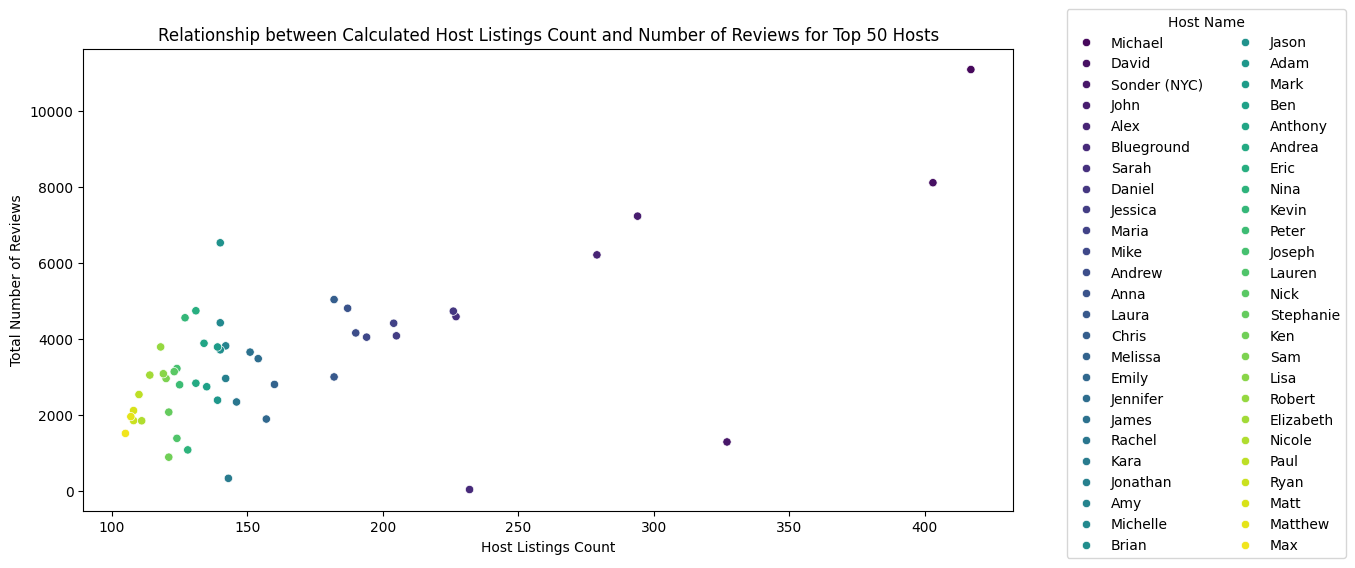

In [ ]:
top_hosts = aba_df.groupby(['host_name', 'room_type']).size().unstack(fill_value=0)
top_hosts['top_host_name'] = top_hosts.sum(axis=1)
top_50_hosts = top_hosts.sort_values(by='top_host_name', ascending=False).head(50)


# Group by 'host_name' and sum the 'number_of_reviews' for each host
reviews_by_host = aba_df.groupby('host_name')['number_of_reviews'].sum().reset_index()

# Merge with the top_20_hosts DataFrame to include the calculated_host_listings_count
merged_data = pd.merge(top_50_hosts, reviews_by_host, on='host_name', how='left')

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='top_host_name', y='number_of_reviews', data=merged_data, palette='viridis', hue='host_name')
plt.title('Relationship between Host Listings Count and Number of Reviews for Top 50 Hosts')
plt.xlabel('Host Listings Count')
plt.ylabel('Total Number of Reviews')
plt.legend(title='Host Name', bbox_to_anchor=(1.05, 1.1), loc='upper left', ncol=2)  # Adjusting legend position

plt.show()


##### 1. Why did you pick the specific chart?


I chose a **scatter plot** to visualize the relationship between the host's listings count and the total number of reviews for the top 50 hosts. A scatter plot is effective in displaying the correlation between two numerical variables, making it suitable for exploring patterns and trends.
Insights from the Chart:



##### 2. What is/are the insight(s) found from the chart?




* The scatter plot reveals a positive correlation between the host's listings count and the total number of reviews. As the host's listings count increases, the total number of reviews tends to increase as well.
* **Each point on the plot represents a host, and the general trend indicates that hosts with more listings tend to accumulate more reviews.**

* These hosts might have a high level of guest satisfaction, leading to more reviews despite a lower number of listings.
Identification of Top Hosts:

* The top 50 hosts are highlighted in the scatter plot, allowing for easy identification of hosts who have both a high listings count and a substantial number of reviews.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Hosts can use this insight to understand the positive correlation between the number of listings and the total number of reviews. **Increasing the number of listings may contribute to higher visibility and attract more guests**, potentially leading to increased reviews and a positive reputation.

* **For the platform, showcasing successful hosts with a high number of reviews can enhance the credibility of the platform and attract more users.**

**Negative Growth Consideration:**

* The positive correlation observed in the **chart may suggest that hosts with fewer listings might face challenges in accumulating a significant number of review**s. This could be a concern for hosts who prefer maintaining a smaller number of high-quality listings.
* There is a risk that hosts may prioritize quantity over quality, potentially leading to negative guest experiences if the focus is solely on increasing listings without proper management.

#### Chart - 16: Correlation HeatMap

In [ ]:
# heatmap of correlation matrix
plt.figure(figsize=(12, 8))
heatmap_data = aba_df.corr()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Airbnb Dataset Heatmap")
plt.show()


#### Chart - 17: Pair Plot

In [ ]:

# pair plot for the entire DataFrame
sns.pairplot(aba_df)
plt.suptitle('Pair Plot of Airbnb Dataset', y=1.02)
plt.show()


### **Successfully completed the EDA Project—an insightful exploration into data. Grateful for the learning experience and eager for future data endeavors!**